In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
dfra=pd.read_csv("Student_Performance.csv")

In [18]:
dfra = dfra.replace({"Yes": 1, "No": 0})

In [19]:
dfra.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [20]:
dfra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [21]:
X=dfra[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced','Extracurricular Activities']]
y=dfra['Performance Index']

In [22]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10,random_state=42)

In [98]:
X_train


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities
4896,1,54,8,5,1
4782,1,87,7,5,1
1496,3,84,6,6,0
1957,1,92,4,6,1
9171,4,81,7,0,1
...,...,...,...,...,...
5734,8,50,6,6,1
5191,4,68,9,3,0
5390,9,48,7,6,0
860,1,47,9,0,0


In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler=StandardScaler()

In [101]:
X_train=scaler.fit_transform(X_train)

In [102]:
X_test=scaler.transform(X_test)

In [103]:
X_test

array([[ 0.0071194 , -0.03066456,  0.85832924, -0.9051256 , -0.98609664],
       [-1.15085537, -1.35666484, -1.5011586 ,  1.18845713,  1.01409939],
       [ 0.77910258, -0.78014298,  0.26845728,  0.14166576,  1.01409939],
       ...,
       [-1.15085537, -0.14596893, -0.91128664,  0.83952668,  1.01409939],
       [ 0.0071194 , -0.43422986,  1.4482012 , -0.20726469,  1.01409939],
       [ 0.0071194 ,  0.48820512, -1.5011586 , -1.25405606,  1.01409939]])

In [104]:
from sklearn.linear_model import LinearRegression
##Cross validation
from sklearn.model_selection import cross_val_score

In [105]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [106]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [107]:
np.mean(mse)

-4.164890303666512

In [108]:
reg_pred=regression.predict(X_test)

In [109]:
reg_pred

array([54.70540057, 22.5849577 , 47.86843352, 31.24255103, 42.98535464,
       59.0550821 , 45.88750987, 86.46271564, 37.66388101, 72.036671  ,
       63.55406552, 24.87747595, 60.77688687, 43.97282015, 48.96744921,
       44.64950839, 58.02932777, 79.00335963, 65.73907061, 46.62889988,
       62.45755468, 15.40086994, 38.34099269, 76.80518598, 84.07291426,
       31.03663979, 28.59531207, 88.86804129, 51.05977391, 56.28314087,
       60.12443163, 33.83268823, 38.61060968, 49.8920263 , 34.67523216,
       63.62516003, 49.8788742 , 46.56393003, 76.27188092, 78.79620762,
       80.67044168, 76.10434394, 68.20038308, 93.60174499, 70.31291063,
       63.85751773, 74.4677516 , 69.53935647, 75.31073606, 42.21013628,
       71.35482455, 57.52720395, 72.85068083, 83.3323649 , 73.77887772,
       90.13013351, 73.96646842, 87.87528153, 73.86640613, 60.35262714,
       37.1624487 , 35.596762  , 15.94761849, 81.90566399, 84.82195424,
       36.11941982, 29.77399833, 67.73175647, 37.44397702, 72.15

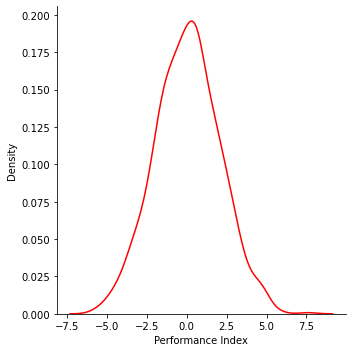

In [110]:
sns.displot(reg_pred-y_test,kind='kde',color='red')

In [111]:
from sklearn.metrics import r2_score


In [112]:
score=r2_score(reg_pred,y_test)

In [113]:
score

0.9889756002351003

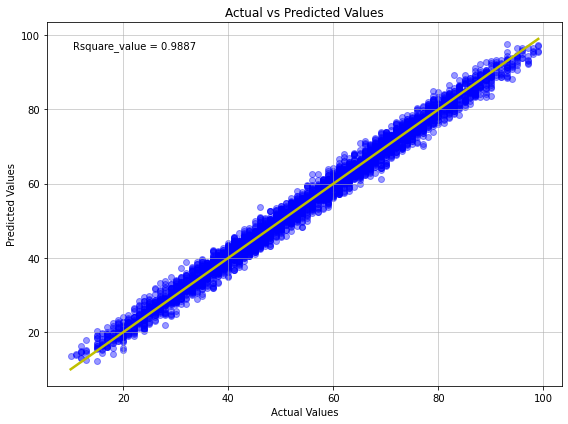

In [76]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, reg_pred, color='blue', alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'-y', lw=2.5)

# Customize the plot
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Add a text box with R-squared value
r2 = regression.score(X_test, y_test)
plt.text(0.05, 0.95, f'Rsquare_value = {r2:.4f}', transform=plt.gca().transAxes,
         verticalalignment='top')

# Improve aesthetics
plt.grid(True, linestyle='-', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()